# BCM Rule

## Single postsynaptic neuron

In [115]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

Updating functions for a single neuron $y$, its weights $w$ and the threshold $\theta$:
$$ y(t) = \mathbf{w}^T\mathbf{x} $$
$$ \frac{d\mathbf{w}}{dt} = \eta \mathbf{x}y(t)(y(t)-\theta) $$
$$ \frac{d\theta}{dt} = \frac{y^2}{y_0} $$

In [161]:
def simple_network(X_NUM=2, Y_NUM=1,  TOT_TIME=5, STEPS_DIM=0.001, INPUT_RATE = 20,
                   TARGET_RATE=10, THETA_START=0.07, ETA=float('1e-2'),TAU=0.01):
    
    

    STEPS_N = round(TOT_TIME/STEPS_DIM)

    time_vect = np.linspace(0,TOT_TIME, STEPS_N)

    theta = np.zeros((Y_NUM,STEPS_N))
    theta[:,0] = THETA_START

    w = np.random.random([Y_NUM, X_NUM, STEPS_N])
    rand_seq = np.random.randint(0,2,STEPS_N)
    x = np.array([rand_seq, 1-rand_seq])*INPUT_RATE
    y = np.zeros((Y_NUM,STEPS_N))

    for i in range(1,STEPS_N):
        y[:,i] = w[:,:,i-1].dot(x[:,i-1])
        
        w[:,:,i] = w[:,:,i-1] + ETA*STEPS_DIM*(
            x[:,i-1, None] * (y[:,i, None]*(y[:,i, None] - theta[:,i-1, None])).T).T 
        
        theta[:,i] = theta[:,i-1] + (STEPS_DIM/TAU) * (-theta[:,i-1] + (y[:,i]**2)/TARGET_RATE)

        w[w < 0] = 0
    
    return y, w, theta, time_vect

In [172]:
y, w, theta, time_vect = simple_network(THETA_START=20, INPUT_RATE = 20)

Plot the values of y, the weights and theta:

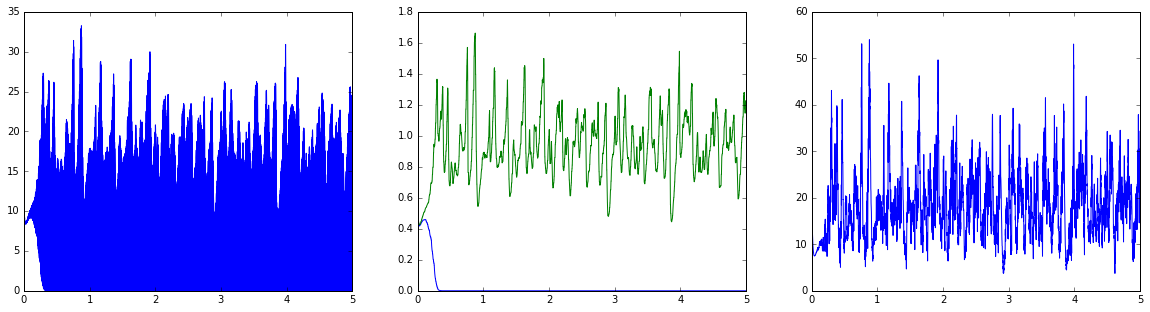

In [173]:
x_max = 5

f, ax = plt.subplots(1,3, figsize = (20,5))
ax[0].plot(time_vect, y[0,:])
#plt.ylim(0, 0.001)
ax[0].set_xlim(0, x_max)

ax[1].plot(time_vect, w[0,0,:])
ax[1].plot(time_vect, w[0,1,:])
#plt.ylim(-50, 10)
ax[1].set_xlim(0, x_max)

ax[2].plot(time_vect, theta[0,:])
ax[2].set_xlim(0, x_max)

plt.show()


## Multiple neurons

Now we can look at a simple network with two input neurons converging on three postsinaptic neurons:    

In [138]:
y, w, theta, time_vect = simple_network(X_NUM=2, Y_NUM=3)

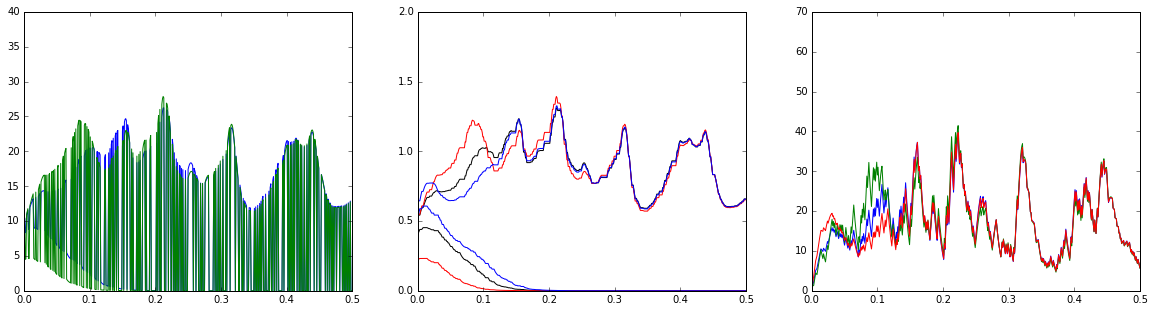

In [140]:
x_max = 0.5

f, ax = plt.subplots(1,3, figsize = (20,5))
ax[0].plot(time_vect, y[0,:])
ax[0].plot(time_vect, y[1,:])
#plt.ylim(0, 0.001)
ax[0].set_xlim(0, x_max)

ax[1].plot(time_vect, w[0,0,:], 'k')
ax[1].plot(time_vect, w[0,1,:], 'k')
ax[1].plot(time_vect, w[1,0,:], 'r')
ax[1].plot(time_vect, w[1,1,:], 'r')
ax[1].plot(time_vect, w[2,0,:], 'b')
ax[1].plot(time_vect, w[2,1,:], 'b')
#plt.ylim(-50, 10)
ax[1].set_xlim(0, x_max)

ax[2].plot(time_vect, theta[0,:])
ax[2].plot(time_vect, theta[1,:])
ax[2].plot(time_vect, theta[2,:])
ax[2].set_xlim(0, x_max)

plt.show()